<a href="https://colab.research.google.com/github/Camilo899/FundamenteoDeepLearnig/blob/main/03%20-%20arquitectura%20de%20linea%20de%20base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arquitectura de Línea Base**

---



---



## Importar Librerías

---



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Montar Google Drive (esto es necesario para acceder al conjunto de datos)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- **Nota**: Los datos fueron sacaron de una base de datos hospedada en Kaggle en el siguiente enlace: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## Creando Generador de Datos (Aumentado)

---



In [16]:
data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalizar los valores de los píxeles a [0,1]
    rotation_range=40,  # Rango de grados para rotaciones aleatorias
    width_shift_range=0.2,  # Rango de cambio aleatorio en el ancho de la imagen
    height_shift_range=0.2,  # Rango de cambio aleatorio en la altura de la imagen
    shear_range=0.2,  # Rango para las transformaciones de corte
    zoom_range=0.2,  # Rango para el zoom aleatorio
    horizontal_flip=True,  # Habilitar volteo horizontal aleatorio
    fill_mode='nearest',  # Cómo llenar los píxeles que pueden quedar fuera de la imagen después de una transformación
    validation_split=0.2  # Porcentaje de datos a utilizar como conjunto de validación
)


## Preparando los Generadores de Datos

---



In [14]:
train_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2418 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


## Visualización de los datos

---



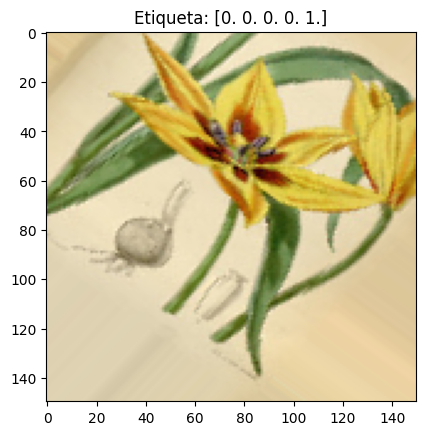

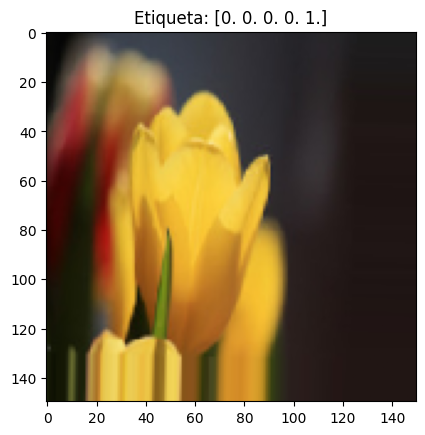

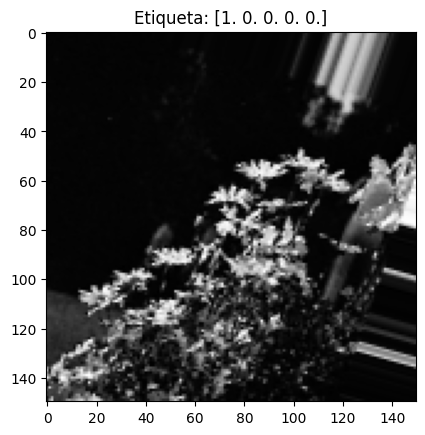

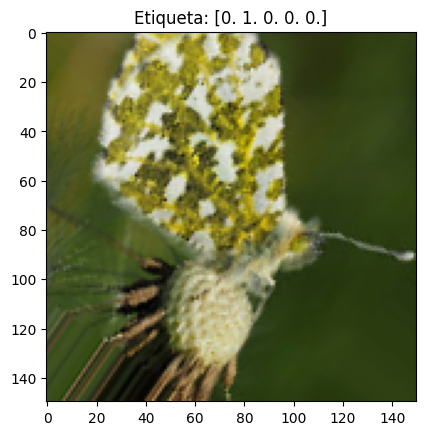

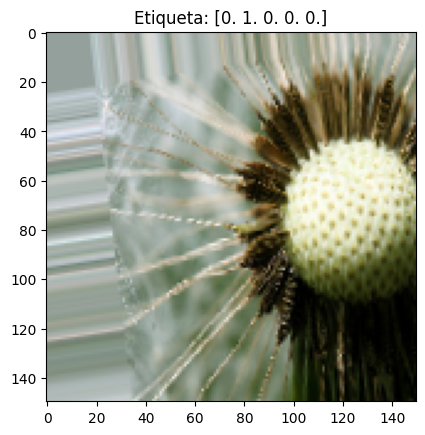

In [15]:
# Obtén un lote de imágenes y etiquetas del generador de datos
images, labels = next(train_data)
# Calcula el índice medio
middle = len(images) // 2
# Muestra las primeras 5 imágenes del medio
for i in range(middle - 2, middle + 3):
    plt.imshow(images[i])
    plt.title('Etiqueta: ' + str(labels[i]))
    plt.show()

## Guardando los datos preprocesados

---



In [ ]:
# Guarda los datos preprocesados
np.save('train_data.npy', train_data)
np.save('val_data.npy', val_data)

## Cargar los datos preprocesados

---



In [ ]:
# Carga los datos preprocesados
train_data = np.load('train_data.npy')
val_data = np.load('val_data.npy')


## Definiendo el Modelo (**Baseline**)

---



In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
])


- Esta arquitectura de línea de base es bastante simple, y consta de dos capas convolucionales (Conv2D), dos capas de agrupación (MaxPooling2D), una capa de aplanamiento (Flatten) y dos capas densas (Dense)

# Compilando el Moldeo

---



In [24]:
from tensorflow.keras import metrics

# Compila el modelo con las métricas deseadas
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc'),
    ]
)


# Entrenanado el Modelo

---



In [26]:
# Entrena el modelo
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
76/76 [==============================] - 25s 310ms/step - loss: 1.4811 - accuracy: 0.4036 - precision: 0.5447 - recall: 0.1286 - auc: 0.7324 - val_loss: 1.3780 - val_accuracy: 0.5156 - val_precision: 0.6034 - val_recall: 0.2734 - val_auc: 0.7778
Epoch 2/10
76/76 [==============================] - 24s 317ms/step - loss: 1.1632 - accuracy: 0.5248 - precision: 0.6483 - recall: 0.3073 - auc: 0.8272 - val_loss: 1.2727 - val_accuracy: 0.5391 - val_precision: 0.6719 - val_recall: 0.3359 - val_auc: 0.8102
Epoch 3/10
76/76 [==============================] - 22s 296ms/step - loss: 1.0416 - accuracy: 0.5943 - precision: 0.7104 - recall: 0.4231 - auc: 0.8634 - val_loss: 1.1466 - val_accuracy: 0.5312 - val_precision: 0.6835 - val_recall: 0.4219 - val_auc: 0.8388
Epoch 4/10
76/76 [==============================] - 24s 308ms/step - loss: 0.9792 - accuracy: 0.6282 - precision: 0.7227 - recall: 0.4872 - auc: 0.8804 - val_loss: 1.2348 - val_accuracy: 0.5156 - val_precision: 0.5610 - val_recal

# Evaluando el Modelo

---



In [27]:
# Evalúa el modelo
loss, accuracy, precision, recall, auc = model.evaluate(val_data)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Exactitud: {accuracy}')
print(f'Sensibilidad: {recall}')
print(f'Puntaje F1: {f1_score}')

4/4 [==============================] - 1s 264ms/step - loss: 0.9910 - accuracy: 0.5859 - precision: 0.6923 - recall: 0.4922 - auc: 0.8788
Exactitud: 0.5859375
Sensibilidad: 0.4921875
Puntaje F1: 0.5753424720865967


# Realizando Predicciones

---



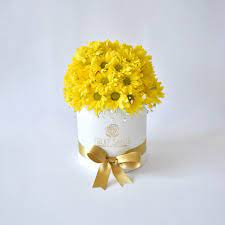

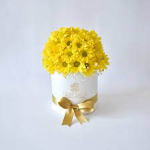

1

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/M2.jpg')

cv2_imshow(image)
image = cv2.resize(image, (150, 150))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 150, 150, 3)
image.shape

result = model(image)
result = np.argmax(result)
result


## Otros Modelos

---



## Definiendo el Modelo (**Aumentado**)

---



In [28]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ])


# Compilando el Moldeo

---



In [29]:
from tensorflow.keras import metrics

# Compila el modelo con las métricas deseadas
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc'),
    ]
)


# Entrenanado el Modelo

---



In [ ]:
# Entrena el modelo
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
76/76 [==============================] - 131s 2s/step - loss: 1.3985 - accuracy: 0.3879 - precision: 0.5062 - recall: 0.1187 - auc: 0.7356 - val_loss: 1.4285 - val_accuracy: 0.4297 - val_precision: 0.5167 - val_recall: 0.2422 - val_auc: 0.7723
Epoch 2/10
76/76 [==============================] - 126s 2s/step - loss: 1.1442 - accuracy: 0.5434 - precision: 0.6374 - recall: 0.3060 - auc: 0.8343 - val_loss: 1.2071 - val_accuracy: 0.5312 - val_precision: 0.6620 - val_recall: 0.3672 - val_auc: 0.8113
Epoch 3/10
76/76 [==============================] - 126s 2s/step - loss: 1.0745 - accuracy: 0.5732 - precision: 0.6689 - recall: 0.4127 - auc: 0.8539 - val_loss: 1.1688 - val_accuracy: 0.5469 - val_precision: 0.6143 - val_recall: 0.3359 - val_auc: 0.8214
Epoch 4/10
76/76 [==============================] - 124s 2s/step - loss: 0.9930 - accuracy: 0.6013 - precision: 0.6926 - recall: 0.4595 - auc: 0.8744 - val_loss: 1.1469 - val_accuracy: 0.5859 - val_precision: 0.6279 - val_recall: 0.421

# Evaluando el Modelo

---



In [ ]:
# Evalúa el modelo
loss, accuracy, precision, recall, auc = model.evaluate(val_data)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precisión: {accuracy}')
print(f'Exhaustividad: {recall}')
print(f'Puntaje F1: {f1_score}')

4/4 [==============================] - 3s 563ms/step - loss: 0.9134 - accuracy: 0.6719 - precision: 0.7320 - recall: 0.5547 - auc: 0.8984
Precisión: 0.671875
Exhaustividad: 0.5546875
Puntaje F1: 0.631111105172428


# Realizando Predicciones

---



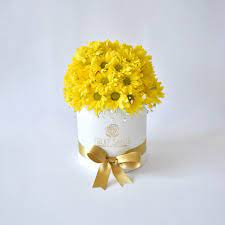

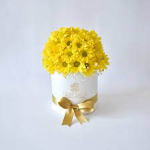

1

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/M2.jpg')

cv2_imshow(image)
image = cv2.resize(image, (150, 150))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 150, 150, 3)
image.shape

result = model(image)
result = np.argmax(result)
result


## Definiendo el Modelo (**Regularizado**)

---



In [30]:
from tensorflow.keras import metrics, regularizers
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ])


# Compilando el Moldeo

---



In [31]:
from tensorflow.keras import metrics

# Compila el modelo con las métricas deseadas
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc'),
    ]
)


# Entrenanado el Modelo

---



In [32]:
# Entrena el modelo
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
76/76 [==============================] - 25s 304ms/step - loss: 2.7729 - accuracy: 0.3428 - precision: 0.4348 - recall: 0.0868 - auc: 0.6916 - val_loss: 1.9270 - val_accuracy: 0.4141 - val_precision: 0.5833 - val_recall: 0.1094 - val_auc: 0.7308
Epoch 2/10
76/76 [==============================] - 24s 320ms/step - loss: 1.6532 - accuracy: 0.4607 - precision: 0.5858 - recall: 0.1849 - auc: 0.7945 - val_loss: 1.7353 - val_accuracy: 0.3750 - val_precision: 0.7143 - val_recall: 0.1172 - val_auc: 0.7495
Epoch 3/10
76/76 [==============================] - 23s 301ms/step - loss: 1.5435 - accuracy: 0.4644 - precision: 0.5912 - recall: 0.2010 - auc: 0.8055 - val_loss: 1.6208 - val_accuracy: 0.4141 - val_precision: 0.6071 - val_recall: 0.1328 - val_auc: 0.7631
Epoch 4/10
76/76 [==============================] - 23s 297ms/step - loss: 1.4817 - accuracy: 0.5045 - precision: 0.6260 - recall: 0.2229 - auc: 0.8174 - val_loss: 1.5667 - val_accuracy: 0.4688 - val_precision: 0.6591 - val_recal

# Evaluando el Modelo

---



In [33]:
# Evalúa el modelo
loss, accuracy, precision, recall, auc = model.evaluate(val_data)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precisión: {accuracy}')
print(f'Exhaustividad: {recall}')
print(f'Puntaje F1: {f1_score}')

4/4 [==============================] - 1s 256ms/step - loss: 1.4787 - accuracy: 0.4844 - precision: 0.5435 - recall: 0.1953 - auc: 0.7992
Precisión: 0.484375
Exhaustividad: 0.1953125
Puntaje F1: 0.28735632039011033


# Realizando Predicciones

---



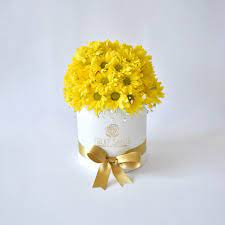

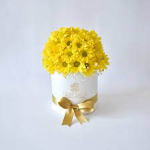

0

In [34]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/M2.jpg')

cv2_imshow(image)
image = cv2.resize(image, (150, 150))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 150, 150, 3)
image.shape

result = model(image)
result = np.argmax(result)
result


## Definiendo el Modelo (**VGG16**)

---



In [35]:
from tensorflow.keras.applications import VGG16
model =tf.keras.models.Sequential([
        VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ])


58889256/58889256 [==============================] - 0s 0us/step


# Compilando el Moldeo

---



In [36]:
from tensorflow.keras import metrics

# Compila el modelo con las métricas deseadas
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc'),
    ]
)


# Entrenanado el Modelo

---



In [37]:
# Entrena el modelo
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
76/76 [==============================] - 49s 440ms/step - loss: 1.7018 - accuracy: 0.2932 - precision: 0.4075 - recall: 0.0583 - auc: 0.6098 - val_loss: 1.3703 - val_accuracy: 0.3984 - val_precision: 0.7045 - val_recall: 0.2422 - val_auc: 0.7252
Epoch 2/10
76/76 [==============================] - 28s 361ms/step - loss: 1.2760 - accuracy: 0.4487 - precision: 0.5959 - recall: 0.2262 - auc: 0.7821 - val_loss: 1.7889 - val_accuracy: 0.4141 - val_precision: 0.4853 - val_recall: 0.2578 - val_auc: 0.6989
Epoch 3/10
76/76 [==============================] - 29s 384ms/step - loss: 1.2935 - accuracy: 0.4367 - precision: 0.6132 - recall: 0.2229 - auc: 0.7772 - val_loss: 1.2563 - val_accuracy: 0.4609 - val_precision: 0.6522 - val_recall: 0.2344 - val_auc: 0.7912
Epoch 4/10
76/76 [==============================] - 28s 359ms/step - loss: 1.1952 - accuracy: 0.4955 - precision: 0.6414 - recall: 0.2655 - auc: 0.8158 - val_loss: 1.1970 - val_accuracy: 0.5000 - val_precision: 0.6780 - val_recal

# Evaluando el Modelo

---



In [38]:
# Evalúa el modelo
loss, accuracy, precision, recall, auc = model.evaluate(val_data)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precisión: {accuracy}')
print(f'Exhaustividad: {recall}')
print(f'Puntaje F1: {f1_score}')

4/4 [==============================] - 2s 396ms/step - loss: 1.1116 - accuracy: 0.5547 - precision: 0.6341 - recall: 0.4062 - auc: 0.8426
Precisión: 0.5546875
Exhaustividad: 0.40625
Puntaje F1: 0.49523809257818724


# Realizando Predicciones

---



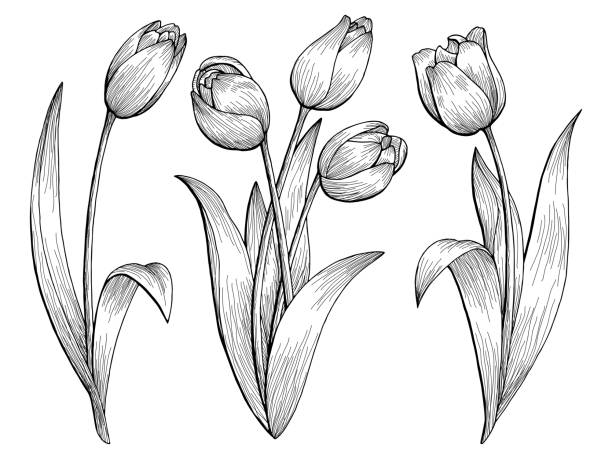

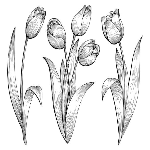

0

In [39]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/Ho.jpg')

cv2_imshow(image)
image = cv2.resize(image, (150, 150))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 150, 150, 3)
image.shape

result = model(image)
result = np.argmax(result)
result


In [ ]:
from tensorflow.keras import metrics, regularizers
from tensorflow.keras.applications import VGG16
import pandas as pd

# Define tus modelos
models = {
    'baseline': tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ]),
    'cnn_deeper': tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ]),
    'cnn_regularized': tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ]),
    'transfer_learning' : tf.keras.models.Sequential([
        VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ])}

# Compila y entrena cada modelo, y guarda los resultados
results = []
for name, model in models.items():
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=[
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc'),
        ]
    )
    model.fit(train_data, validation_data=val_data, epochs=10)
    loss, accuracy, precision, recall, auc = model.evaluate(val_data)
    f1_score = 2 * (precision * recall) / (precision + recall)
    results.append([name, accuracy, precision, recall, f1_score, auc])

# Crea un DataFrame de pandas con los resultados
df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Muestra el DataFrame
print(df)


Epoch 1/10
76/76 [==============================] - 25s 295ms/step - loss: 1.5309 - accuracy: 0.3871 - precision: 0.5113 - recall: 0.1402 - auc: 0.7236 - val_loss: 1.4389 - val_accuracy: 0.3828 - val_precision: 0.5362 - val_recall: 0.2891 - val_auc: 0.7351
Epoch 2/10
76/76 [==============================] - 23s 304ms/step - loss: 1.1968 - accuracy: 0.5045 - precision: 0.6184 - recall: 0.2560 - auc: 0.8166 - val_loss: 1.3406 - val_accuracy: 0.4375 - val_precision: 0.5410 - val_recall: 0.2578 - val_auc: 0.7840
Epoch 3/10
76/76 [==============================] - 25s 325ms/step - loss: 1.1209 - accuracy: 0.5471 - precision: 0.6391 - recall: 0.3486 - auc: 0.8403 - val_loss: 1.2527 - val_accuracy: 0.4688 - val_precision: 0.6604 - val_recall: 0.2734 - val_auc: 0.8024
Epoch 4/10
76/76 [==============================] - 23s 298ms/step - loss: 1.0491 - accuracy: 0.5939 - precision: 0.6848 - recall: 0.4330 - auc: 0.8611 - val_loss: 1.0985 - val_accuracy: 0.5781 - val_precision: 0.7162 - val_recal

## Realizando Predicciones

---



In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Carga una imagen desde un archivo
img = image.load_img('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/R_3.jpg', target_size=(150, 150))

# Convierte la imagen en un array de numpy
img_array = image.img_to_array(img)

# Expande las dimensiones para que se ajuste al formato de entrada del modelo (1, alto, ancho, canales)
img_batch = np.expand_dims(img_array, axis=0)

# Normaliza la imagen dividiendo por 255
img_batch /= 255.

# Haz predicciones en la imagen
for name, model in models.items():
    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions[0])
    print(f'El modelo {name} predice la clase {predicted_class} para la imagen nueva.')


1/1 [==============================] - 0s 17ms/step
El modelo baseline predice la clase 2 para la imagen nueva.
1/1 [==============================] - 0s 19ms/step
El modelo cnn_deeper predice la clase 2 para la imagen nueva.
1/1 [==============================] - 0s 17ms/step
El modelo cnn_regularized predice la clase 2 para la imagen nueva.
1/1 [==============================] - 0s 19ms/step
El modelo transfer_learning predice la clase 4 para la imagen nueva.


## Ajustando los modelos

In [ ]:
from tensorflow.keras import metrics, regularizers
import pandas as pd
import numpy as np

# Define tus modelos
models = {
    'baseline': tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ]),
    'cnn_deeper': tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),  # Capa adicional
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ]),
    'cnn_regularized': tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
    ])}

# Compila y entrena cada modelo, y guarda los resultados
results = []
for name, model in models.items():
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),  # Función de pérdida de entropía cruzada
        metrics=[
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc'),
        ]
    )
    # Ajusta los pesos de clase
    class_weights = {0: 1., 1: 50., 2: 2., 3: 1., 4: 1.}  # Ajusta estos valores según tus datos
    model.fit(train_data, validation_data=val_data, epochs=10, class_weight=class_weights)
    loss, accuracy, precision, recall, auc = model.evaluate(val_data)
    f1_score = 2 * (precision * recall) / (precision + recall)
    results.append([name, accuracy, precision, recall, f1_score, auc])

# Crea un DataFrame de pandas con los resultados
df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Muestra el DataFrame
print(df)


Epoch 1/10
76/76 [==============================] - 112s 1s/step - loss: 5.1695 - accuracy: 0.3069 - precision: 0.3016 - recall: 0.2767 - auc: 0.5975 - val_loss: 4.7035 - val_accuracy: 0.2578 - val_precision: 0.2560 - val_recall: 0.2500 - val_auc: 0.5520
Epoch 2/10
76/76 [==============================] - 108s 1s/step - loss: 4.1529 - accuracy: 0.3184 - precision: 0.3200 - recall: 0.2945 - auc: 0.6318 - val_loss: 2.3076 - val_accuracy: 0.3047 - val_precision: 0.3273 - val_recall: 0.2812 - val_auc: 0.6592
Epoch 3/10
76/76 [==============================] - 110s 1s/step - loss: 3.5709 - accuracy: 0.3408 - precision: 0.3407 - recall: 0.3060 - auc: 0.6689 - val_loss: 2.1799 - val_accuracy: 0.3906 - val_precision: 0.3905 - val_recall: 0.3203 - val_auc: 0.6837
Epoch 4/10
76/76 [==============================] - 111s 1s/step - loss: 3.4364 - accuracy: 0.3615 - precision: 0.3631 - recall: 0.3275 - auc: 0.6984 - val_loss: 2.5945 - val_accuracy: 0.3438 - val_precision: 0.3604 - val_recall: 0.312

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Carga una imagen desde un archivo
img = image.load_img('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/Vn.jpg', target_size=(150, 150))

# Convierte la imagen en un array de numpy
img_array = image.img_to_array(img)

# Expande las dimensiones para que se ajuste al formato de entrada del modelo (1, alto, ancho, canales)
img_batch = np.expand_dims(img_array, axis=0)

# Normaliza la imagen dividiendo por 255
img_batch /= 255.

# Haz predicciones en la imagen
for name, model in models.items():
    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions[0])
    print(f'El modelo {name} predice la clase {predicted_class} para la imagen nueva.')


1/1 [==============================] - 0s 32ms/step
El modelo baseline predice la clase 1 para la imagen nueva.
1/1 [==============================] - 0s 31ms/step
El modelo cnn_deeper predice la clase 1 para la imagen nueva.
1/1 [==============================] - 0s 34ms/step
El modelo cnn_regularized predice la clase 1 para la imagen nueva.
